## Neural Network

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
from scipy import optimize
import itertools
import math



In [2]:
X = np.loadtxt('xy/x.csv', delimiter=',')
Y = np.loadtxt('xy/y.csv', delimiter=',')
T1 = np.loadtxt('theta/theta1.csv', delimiter=',')
T2 = np.loadtxt('theta/theta2.csv', delimiter=',')

In [3]:
def sigmoid(a):
    return 1.0 / (1 + np.exp(-a))

In [4]:
def precision(res, y):
    contador = 0
    for i in range(res.shape[0]) :
        if ((res[i]+1) == Y[i]):
            contador +=1
    
    return (contador*100.0)/res.shape[0]

In [5]:
def init_weight(input_layer, hidden_layer, out_layer):
    w1 = np.random.randn(hidden_layer, input_layer) 
    w2 = np.random.randn(out_layer, hidden_layer )
    #w1 = T1
    #w2 = T2
    return w1,w2

In [6]:
#vectorizando Y
def create_Y(y, out_size, m):
    yn = np.zeros((m, out_size))
    for i in range(m):
        yn[i][int(y[i])%10] = 1
    return yn

In [7]:
def compute_cost(a3, Y):
    m = Y.shape[0] # 5000
    temp = np.sum(Y * np.log(a3) + (1 - Y) * (np.log(1 - a3)), axis=1)
    cost = (-1/m) * np.sum(temp, axis=0)
    return cost

In [8]:
def gradiente_prima(z):
    gz = sigmoid(z)
    return gz * (1-gz);

### Forward

In [9]:
def forward(x, t1, t2):
    #capa1
    a1 = np.c_[np.ones((x.shape[0],1)),X] 
    #capa2
    z2 = np.dot(a1, t1.T)
    a2= sigmoid(z2)
    #capa3
    z3 = np.dot(a2,t2.T) 
    a3 = sigmoid(z3)
    
    result={'a1': a1, 'a2':a2, 'a3':a3, 'z2':z2, 'z3':z3}    
    return result

### Compute Gradiente

In [10]:
def compute_gradient_reg(ford,t2, y_vec , m):
    a1 = ford['a1']
    a2 = ford['a2']
    a3 = ford['a3']
    z2 = ford['z2']
    z3 = ford['z3']
        
    d3 = a3 - y_vec 
    d2 = np.dot(d3,t2) * gradiente_prima(z2)

    delta1 = np.dot(d2.T,a1)
    delta2 = np.dot(d3.T,a2) 
    
    grad1 = delta1/m
    grad2 = delta2/m
        
    return grad1,grad2

In [11]:
def session(x, y, hidden_layer, iterations):
    input_layer = x.shape[1]+1
    out_layer = y.shape[1] 
    m = x.shape[0]
    rate = 1.5
    
    w1,w2 = init_weight(input_layer, hidden_layer, out_layer)
    
    for i in range(iterations):
        ford = forward(x, w1, w2)
        cost = compute_cost(ford['a3'], y) 
        grad1,grad2 = compute_gradient_reg(ford, w2, y,m) #backward
        
        w1 = w1 - rate * grad1
        w2 = w2 - rate * grad2
        
        if i % 100 == 0:
            print (i," iteracion con costo: ",cost)

    return w1,w2

In [12]:
Y_vec = create_Y(Y, 10, X.shape[0])
W1,W2 = session(X, Y_vec, 25,1000)

0  iteracion con costo:  13.649989715328836
100  iteracion con costo:  1.2414866560429845
200  iteracion con costo:  0.873640341334444
300  iteracion con costo:  0.7057606187208306
400  iteracion con costo:  0.6085411305457178
500  iteracion con costo:  0.5419639131816915
600  iteracion con costo:  0.49228705702573755
700  iteracion con costo:  0.45294543101654544
800  iteracion con costo:  0.4201783295324929
900  iteracion con costo:  0.3917796645605069


In [15]:
ford = forward(X, W1, W2)
out = ford['a3']

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=mpl.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    mpl.imshow(cm, interpolation='nearest', cmap=cmap)
    mpl.title(title)
    mpl.colorbar()
    tick_marks = np.arange(len(classes))
    mpl.xticks(tick_marks, classes, rotation=45)
    mpl.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        mpl.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    mpl.tight_layout()
    mpl.ylabel('Valores Calculados')
    mpl.xlabel('Valores Reales')

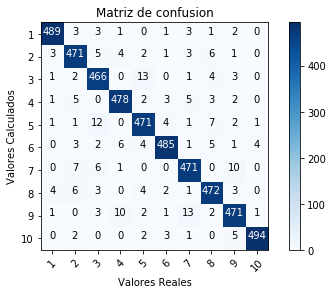

In [17]:
mat = np.zeros((10,10),dtype=int)
result = np.argmax(out,axis=1).T #prediccion
def conf_matr():
    for i in range(len(result)):
        k = int(Y[i]-1) #valores reales
        l = int(result[i]-1) #valores predicho
        mat[l][k] += 1        
    names=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
    
    mpl.figure()
    plot_confusion_matrix(mat, classes=names,
                          title='Matriz de confusion')
    
  #  mpl.figure()
  #  plot_confusion_matrix(mat, classes=names, normalize=True,
                          #title='Matriz de confusion normalizada')
    
conf_matr()

In [18]:
fn=500
rpta=np.zeros((10,3))
fp = np.sum(mat, axis=1)

for i in range(10):
    rpta[i,0]= mat[i][i]/fp[i]
    rpta[i,1]= mat[i][i]/fn
    rpta[i,2]= 2*(rpta[i,0]*rpta[i,1])/(rpta[i,0]+rpta[i,1])
    
    
data = pd.DataFrame(rpta,columns=['Precision','Recall','F1 score'],index=['1','2','3','4','5','6','7','8','9','10'])
print (data)


    Precision  Recall  F1 score
1    0.972167   0.978  0.975075
2    0.949597   0.942  0.945783
3    0.951020   0.932  0.941414
4    0.957916   0.956  0.956957
5    0.942000   0.942  0.942000
6    0.949119   0.970  0.959446
7    0.951515   0.942  0.946734
8    0.953535   0.944  0.948744
9    0.934524   0.942  0.938247
10   0.974359   0.988  0.981132
